# 1. Nhập dữ liệu ✅

In [2]:
import pandas as pd
import matplotlib.pylab as plt

In [3]:
raw_filename = "https://raw.githubusercontent.com/Cornunicorncrazy/supermarket_data/main/Supmarket_X.csv"
headers = ["Store", "Date", "Weekly_Sales", "Holiday_Flag", "Temperature", "Fuel_Price", "CPI", "Unemployment"]
df = pd.read_csv(raw_filename, names=headers, header=0)

pd.set_option('display.max_columns',None, 'display.max_rows', None)

# Mô tả dữ liệu ✅

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


Nhận xét về data:
- Số hiệu của cửa hàng đang dưới dạng INT
- Dtype của Date đang là object, chưa phải là date time.
- Holiday flag có value là 0, 1 
- Các data dạng số khác chưa được chuẩn hóa
- Data không có null value

| Tên Cột | Ý Nghĩa |
|--------|---------|
| `Store` | Số hiệu của cửa hàng. |
| `Date` | Thời gian ghi nhận số liệu (theo tuần). |
| `Weekly_Sales` | Tổng doanh thu (theo tuần) |
| `Holiday_Flag` | ... |
| `Temperature` | Nhiệt độ (theo độ F) ... |
| `Fuel_Price` | Giá nhiên liệu ... |
| `CPI` | Chỉ số tiêu dùng CPI ... |
| `Unemployment` | Tỷ lệ thất nghiệp ... |

# 3. Kiểm tra giá trị NULL ✅

In [5]:
df.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

Kiểm tra cho thấy, dataset không có giá trị NULL

# 4. Kiểm tra Data format ✅

In [6]:
df.dtypes

Store             int64
Date             object
Weekly_Sales    float64
Holiday_Flag      int64
Temperature     float64
Fuel_Price      float64
CPI             float64
Unemployment    float64
dtype: object

In [7]:
# Đổi lại định dạng của cột Date từ object về datetime64[ns]
df[["Date"]] = df[["Date"]].astype("datetime64[ns]")

In [8]:
df.dtypes

Store                    int64
Date            datetime64[ns]
Weekly_Sales           float64
Holiday_Flag             int64
Temperature            float64
Fuel_Price             float64
CPI                    float64
Unemployment           float64
dtype: object

# 5. Data Standardization and normalization ✅

In [9]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106


In [10]:
import seaborn as sns # for data visualization
import matplotlib.pyplot as plt # for math plotting
%matplotlib inline

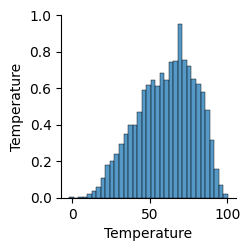

In [11]:
data = df[['Temperature']]
sns.pairplot(data)
plt.show()

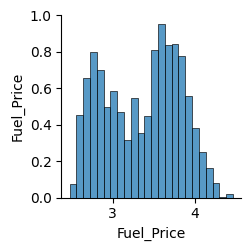

In [12]:
data = df[['Fuel_Price']]
sns.pairplot(data)
plt.show()

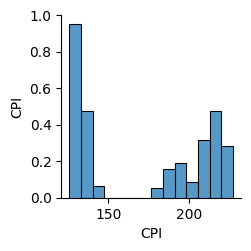

In [13]:
data = df[['CPI']]
sns.pairplot(data)
plt.show()

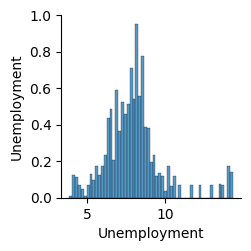

In [14]:
data = df[['Unemployment']]
sns.pairplot(data)
plt.show()

Kết luận qua biểu đồ distribution:
- Temperature không nhiều outliers => có thể sử dụng MinMaXScaler
- Fuel Price, CPI, Unemployment không phải normal distribution, có nhiều outliers => nên sử dụng RobustScaler

In [15]:
df['Temperature'] = df['Temperature']/df['Temperature'].max()

from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
df[['Fuel_Price']] = scaler.fit_transform(df[['Fuel_Price']])
df[['CPI']] = scaler.fit_transform(df[['CPI']])
df[['Unemployment']] = scaler.fit_transform(df[['Unemployment']])

In [16]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-05-02,1643690.90,0,0.422508,-1.088529,0.351567,0.134027
1,1,2010-12-02,1641957.44,1,0.384562,-1.118454,0.353367,0.134027
2,1,2010-02-19,1611968.17,0,0.398742,-1.160848,0.353947,0.134027
3,1,2010-02-26,1409727.59,0,0.465648,-1.102244,0.354323,0.134027
4,1,2010-05-03,1554806.68,0,0.464350,-1.022444,0.354700,0.134027
